In [1]:
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

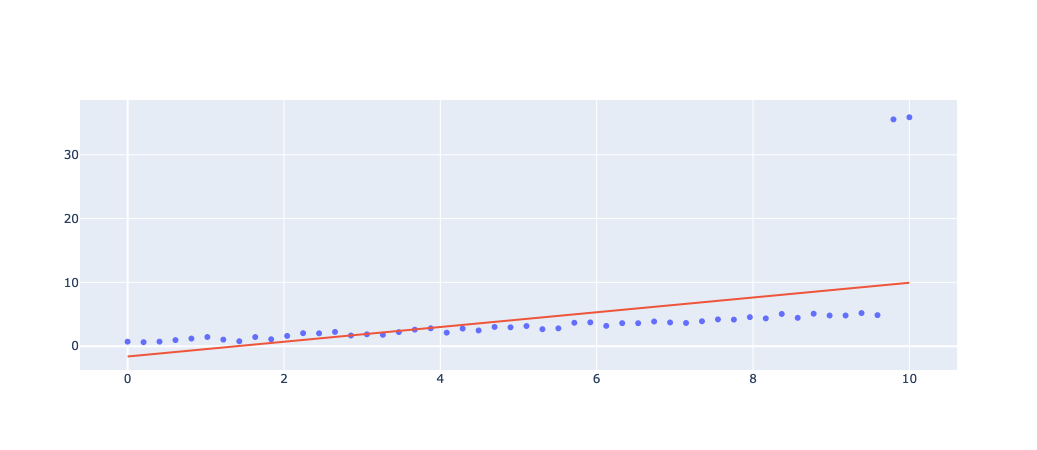

In [2]:
N= 50
x = np.linspace(0,10,N)
y = 0.5 *x + np.random.rand(N)
df = pd.DataFrame(x)
df['ones'] = 1
X= df.values
y[-1] = y[-1] + 30
y[-2] = y[-2] + 30
w = np.linalg.solve(np.matmul(X.T,X),np.matmul(X.T,y))
fig = go.Figure()
fig.add_trace(go.Scatter(x=x,y=y,mode ='markers'))
fig.add_trace(go.Scatter(x=x,y=np.matmul(X,w),mode ='lines'))
fig.update_layout(showlegend=False)
fig.show()

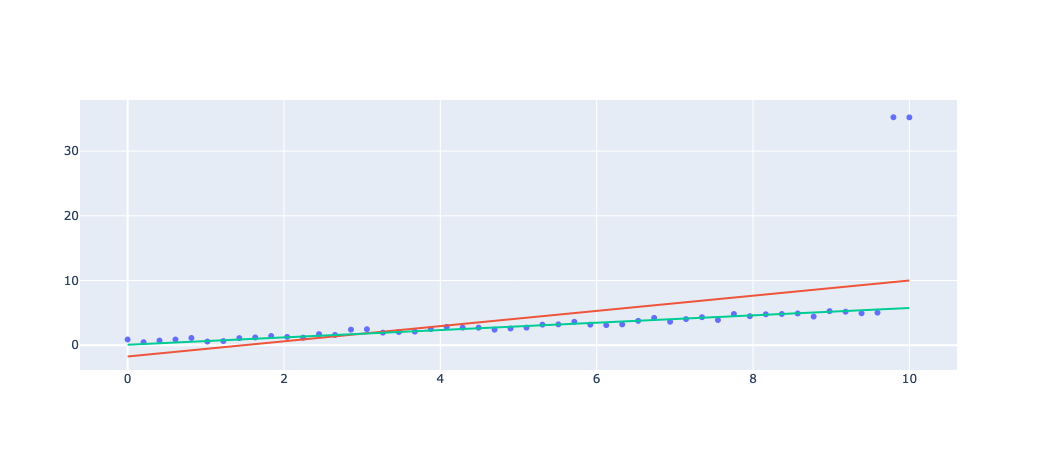

[ 1.17593605 -1.74866846]
[0.56915446 0.06120188]


In [3]:
λ = 1000
N= 50
x = np.linspace(0,10,N)
y = 0.5 *x + np.random.rand(N)
df = pd.DataFrame(x)
df['ones'] = 1
X= df.values
y[-1] = y[-1] + 30
y[-2] = y[-2] + 30
w = np.linalg.solve(np.matmul(X.T,X),np.matmul(X.T,y))
w_reg = np.linalg.solve(np.matmul(X.T,X) + λ*np.identity(X.shape[1]),np.matmul(X.T,y))
fig = go.Figure()
fig.add_trace(go.Scatter(x=x,y=y,mode ='markers'))
fig.add_trace(go.Scatter(x=x,y=np.matmul(X,w),mode ='lines'))
fig.add_trace(go.Scatter(x=x,y=np.matmul(X,w_reg),mode ='lines'))
fig.update_layout(showlegend=False)
fig.show()
print(w)
print(w_reg)

In [4]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=λ,fit_intercept=False)
model.fit(X,y)
model.coef_

array([0.56915446, 0.06120188])

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False,n_jobs=-1)
model.fit(X,y)
model.coef_

array([ 1.17593605, -1.74866846])